<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Exactly 10
#pmf is probability at one value
#What is the probability that a base has coverage exactly equal to 10?
#What proportion of bases do we expect to have coverage exactly equal to 10?
print(ss.poisson.pmf(10, mu = 16.7))

0.025982673190913498


In [3]:
#At most 10 (10 or less)
#cdf is probability added up to that value
#What is probability coverage is AT MOST?
print(ss.poisson.cdf(10, mu = 16.7))

0.05646445563750697


In [4]:
#At least 10
print(1 - ss.poisson.cdf(9,mu=16.7))

0.9695182175534065


In [6]:
poisson_10X = pd.Series(index = range(32), data = [ss.poisson.pmf(i,16.7) for i in range(32)]) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


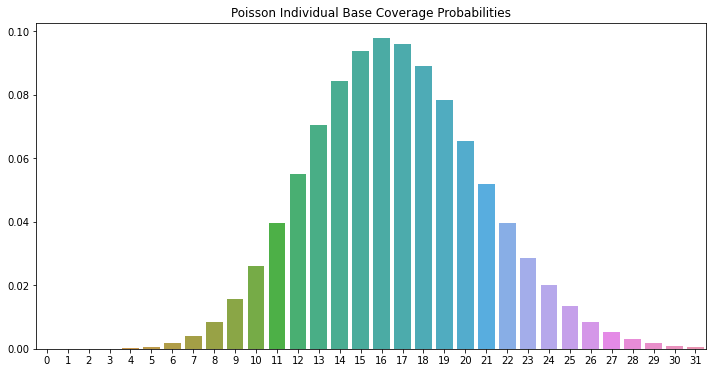

In [7]:
plt.figure(figsize = [12,6])
plt.title('Poisson Individual Base Coverage Probabilities')
sns.barplot(poisson_10X.index, poisson_10X.values)

In [8]:
poisson_10X = pd.Series(index = range(32), data = [ss.poisson.cdf(i,16.7) for i in range(32)])    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


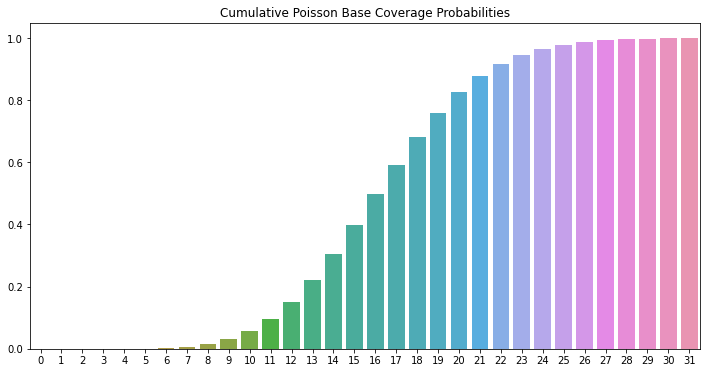

In [9]:
plt.figure(figsize = [12,6])
plt.title('Cumulative Poisson Base Coverage Probabilities')
sns.barplot(poisson_10X.index, poisson_10X.values)

In [10]:
# Suppose that we have 15X coverage of our reference sequence.
#What proportion of bases in the reference do we expect to have coverage of at least 12X?
#Give your answer rounded to two decimal places (e.g. 0.5729 would be 0.57).
print(1 - ss.poisson.cdf(11,mu=15))

0.8152482009760685


In [15]:
# You are re-sequencing a 6Mb (megabase - mega = million) bacterial genome.
# You want to obtain 10X coverage. You have the option of using Illumina MiSeq,
#  which will generate 300 base pair reads, or the Illumina HiSeq which will generate 250 base pair reads.
# Select the options below which apply - select ALL that apply (i.e. select more than one).
# (We won't worry about whether the reads are paired or not - the counts given are just total counts).
# Very few reads (<5%) will have more than 10 reads aligned to them
print(1 - ss.poisson.cdf(10,mu=10)) #False

0.41696024980701485


In [13]:
# It would be rare (happen <1% of the time) to find a base with less than 8 reads aligning to it
print(ss.poisson.cdf(7,mu=10)) #False

0.22022064660169907


In [16]:
# We would expect about half (~50%) of the bases to have at least 10 reads aligned to them
print(1 - ss.poisson.cdf(9,mu=10)) #True

0.5420702855281476
